In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential
import tensorflow as tf
from datetime import datetime, timedelta



In [8]:
import requests
import pandas as pd

# Define your Tiingo API key
api_key = '09de77c9d958c8805b51ab9dc02c8670b254450c'

# Define the stock symbol and date range
symbol = 'NVDA'
start_date = '2010-01-01'
today = datetime.now()
end_date = (today - timedelta(days=0)).strftime('%Y-%m-%d')
# Define the Tiingo API endpoint
url = f'https://api.tiingo.com/tiingo/daily/{symbol}/prices?startDate={start_date}&endDate={end_date}&token={api_key}'

# Make a GET request to the Tiingo API
response = requests.get(url)

# Convert the JSON response to a DataFrame
data = response.json()
df = pd.DataFrame(data)

# Print the DataFrame
print(df.head())


                       date  close     high    low   open    volume  adjClose  \
0  2010-01-04T00:00:00.000Z  18.49  18.6200  18.11  18.51  20005100  4.240824   
1  2010-01-05T00:00:00.000Z  18.76  18.9600  18.42  18.51  18216200  4.302751   
2  2010-01-06T00:00:00.000Z  18.88  18.9200  18.57  18.75  16229200  4.330274   
3  2010-01-07T00:00:00.000Z  18.51  18.8600  18.37  18.78  13694800  4.245412   
4  2010-01-08T00:00:00.000Z  18.55  18.6821  18.25  18.36  11954200  4.254586   

    adjHigh    adjLow   adjOpen  adjVolume  divCash  splitFactor  
0  4.270641  4.153668  4.245412   80020400      0.0          1.0  
1  4.348623  4.224769  4.245412   72864800      0.0          1.0  
2  4.339448  4.259173  4.300457   64916800      0.0          1.0  
3  4.325687  4.213302  4.307338   54779200      0.0          1.0  
4  4.284884  4.185779  4.211008   47816800      0.0          1.0  


In [9]:
# start = '2010-01-01'
# end = '2024-03-11'

# df=pdr.DataReader('NVDA','tiingo',start,end,api_key='09de77c9d958c8805b51ab9dc02c8670b254450c')

# df.head()

In [10]:
df.tail()

date    close    high      low    open    volume  \
3569  2024-03-11T00:00:00.000Z  857.740  887.97  841.660  864.29  66611510   
3570  2024-03-12T00:00:00.000Z  919.130  919.60  861.501  880.49  65437480   
3571  2024-03-13T00:00:00.000Z  908.880  915.04  884.350  910.55  62726626   
3572  2024-03-14T00:00:00.000Z  879.440  906.46  866.000  895.77  59711081   
3573  2024-03-15T00:00:00.000Z  878.365  895.46  862.570  869.30  64208616   

      adjClose  adjHigh   adjLow  adjOpen  adjVolume  divCash  splitFactor  
3569   857.740   887.97  841.660   864.29   66611510      0.0          1.0  
3570   919.130   919.60  861.501   880.49   65437480      0.0          1.0  
3571   908.880   915.04  884.350   910.55   62726626      0.0          1.0  
3572   879.440   906.46  866.000   895.77   59711081      0.0          1.0  
3573   878.365   895.46  862.570   869.30   64208616      0.0          1.0

### Converting the Above to Rows and Columns with reset_index()

In [11]:
df=df.reset_index()

In [12]:
df.head()

index                      date  close     high    low   open    volume  \
0      0  2010-01-04T00:00:00.000Z  18.49  18.6200  18.11  18.51  20005100   
1      1  2010-01-05T00:00:00.000Z  18.76  18.9600  18.42  18.51  18216200   
2      2  2010-01-06T00:00:00.000Z  18.88  18.9200  18.57  18.75  16229200   
3      3  2010-01-07T00:00:00.000Z  18.51  18.8600  18.37  18.78  13694800   
4      4  2010-01-08T00:00:00.000Z  18.55  18.6821  18.25  18.36  11954200   

   adjClose   adjHigh    adjLow   adjOpen  adjVolume  divCash  splitFactor  
0  4.240824  4.270641  4.153668  4.245412   80020400      0.0          1.0  
1  4.302751  4.348623  4.224769  4.245412   72864800      0.0          1.0  
2  4.330274  4.339448  4.259173  4.300457   64916800      0.0          1.0  
3  4.245412  4.325687  4.213302  4.307338   54779200      0.0          1.0  
4  4.254586  4.284884  4.185779  4.211008   47816800      0.0          1.0

### Selecting only the required column

In [13]:
df=df[['close','high','low','open','volume']]

In [14]:
df

close      high      low    open    volume
0      18.490   18.6200   18.110   18.51  20005100
1      18.760   18.9600   18.420   18.51  18216200
2      18.880   18.9200   18.570   18.75  16229200
3      18.510   18.8600   18.370   18.78  13694800
4      18.550   18.6821   18.250   18.36  11954200
...       ...       ...      ...     ...       ...
3569  857.740  887.9700  841.660  864.29  66611510
3570  919.130  919.6000  861.501  880.49  65437480
3571  908.880  915.0400  884.350  910.55  62726626
3572  879.440  906.4600  866.000  895.77  59711081
3573  878.365  895.4600  862.570  869.30  64208616

[3574 rows x 5 columns]

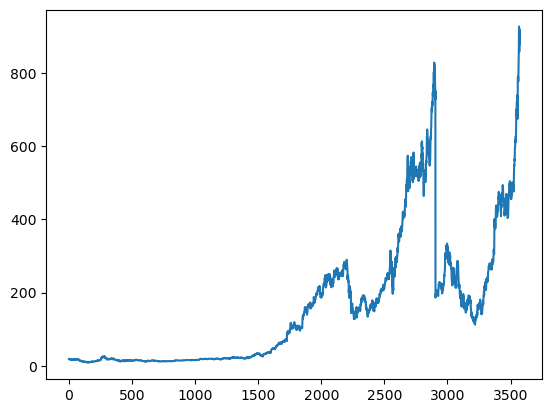

In [15]:
plt.plot(df.close)

### Closing Stock Data Average for 100 days

In [16]:
movingavg100day=df.close.rolling(100).mean()
movingavg100day

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3569    566.09800
3570    570.89550
3571    575.76470
3572    580.34900
3573    584.99395
Name: close, Length: 3574, dtype: float64

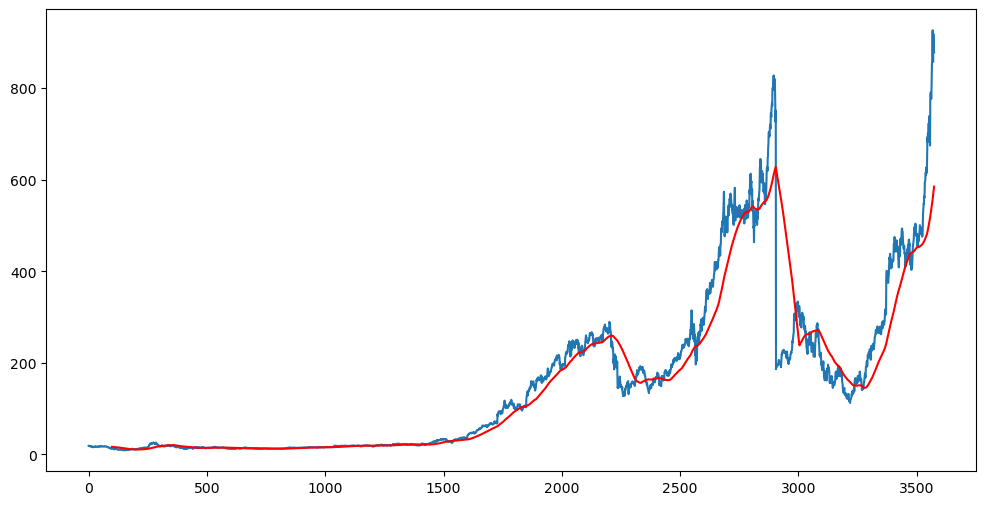

In [17]:
plt.figure(figsize=(12,6))
plt.plot(df.close)
plt.plot(movingavg100day,'r')

### Closing Stock Data for 200 Days

In [18]:
movingavg200day=df.close.rolling(200).mean()
movingavg200day

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3569    501.374700
3570    504.443450
3571    507.088850
3572    509.538750
3573    511.925025
Name: close, Length: 3574, dtype: float64

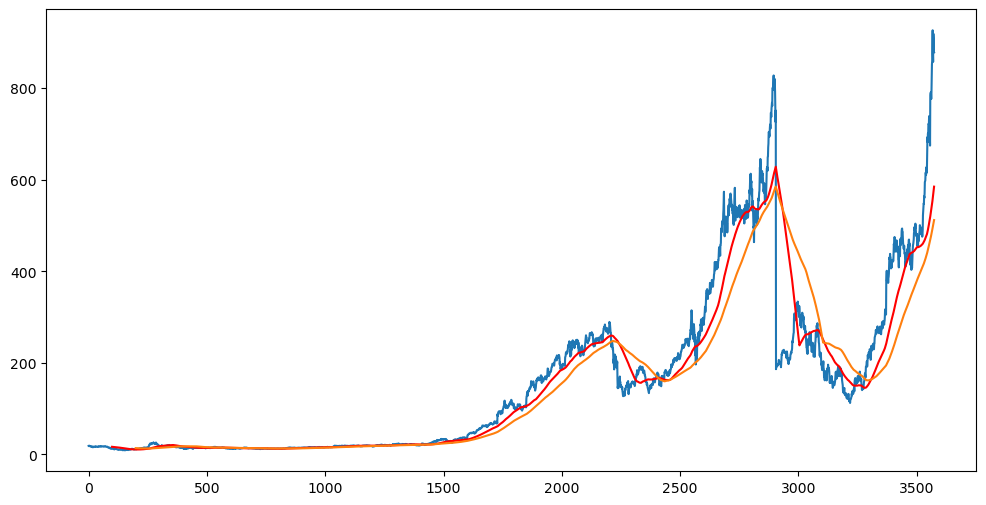

In [19]:
plt.figure(figsize=(12,6))
plt.plot(df.close)
plt.plot(movingavg100day,'r')
plt.plot(movingavg200day)

In [20]:
df.shape

(3574, 5)

### Splitting the data into TRAINING AND TESTING Dataset 

In [21]:
# 70:30  Split
split_point = int(len(df) * 0.70)

train=pd.DataFrame(df['close'][:split_point])
test=pd.DataFrame(df['close'][split_point:])

print(train.shape)
print(test.shape)

(2501, 1)
(1073, 1)


In [22]:
train.head()

close
0  18.49
1  18.76
2  18.88
3  18.51
4  18.55

In [23]:
test.head()

close
2501  213.98
2502  217.34
2503  224.07
2504  223.99
2505  225.15

### Using MinMaxScaler from sklearn.preprocessing
### Which converts all the data between 0 and 1 for machine learning model

In [24]:
scaler=MinMaxScaler(feature_range=(0,1))
scaler

MinMaxScaler()

# Training The model

In [25]:
df_train_array=scaler.fit_transform(train)
df_train_array

array([[0.03425408],
       [0.03521673],
       [0.03564457],
       ...,
       [0.71256161],
       [0.72479076],
       [0.72479076]])

In [26]:
df_train_array.shape

(2501, 1)

In [27]:
#Model Training
x_train=[]

#Training To Be Predicted 
y_train=[]




for i in range(100,df_train_array.shape[0]):
    x_train.append(df_train_array[i-100:i])
    y_train.append(df_train_array[i,0])
    

#### Time series prediction which will depend on the previous 100 days 

In [28]:
x_train

[array([[0.03425408],
        [0.03521673],
        [0.03564457],
        [0.03432539],
        [0.03446801],
        [0.03354101],
        [0.0313305 ],
        [0.03218618],
        [0.03118788],
        [0.0293339 ],
        [0.03047482],
        [0.03020741],
        [0.02911998],
        [0.02701643],
        [0.02801472],
        [0.02612509],
        [0.02769384],
        [0.02569725],
        [0.0232015 ],
        [0.02740862],
        [0.02801472],
        [0.02851387],
        [0.02501983],
        [0.02616074],
        [0.02605378],
        [0.02559029],
        [0.02669555],
        [0.02936956],
        [0.03018959],
        [0.0313305 ],
        [0.03193661],
        [0.02776515],
        [0.02744427],
        [0.02755123],
        [0.02612509],
        [0.02733731],
        [0.02680251],
        [0.02608944],
        [0.02840691],
        [0.02837126],
        [0.02762254],
        [0.0277295 ],
        [0.02954782],
        [0.02865649],
        [0.03090266],
        [0

In [32]:
y_train

array([0.016463  , 0.01517947, 0.01318288, ..., 0.71256161, 0.72479076,
       0.72479076])

### Converting the training dataset to np array for faster calculations

In [33]:
x_train,y_train=np.array(x_train),np.array(y_train)

# ML Model

### Here we are using Recurrent Neural Network(RNN) 
### which is a type of Neural Network where the output from the previous step is fed as input to the current step. 

#### sequential Keras model. 
#### sequential model is a linear stack of layers, where you add one layer at a time in a sequential fashion.

In [34]:
seq_model = Sequential()

seq_model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
seq_model.add(Dropout(0.2))

# Long Short-Term Memory (LSTM) layer to the model.an RNN model

# units -Specifies that the LSTM layer should have 50 hidden units (neurons).

#ReLU function that will output the input directly if it is positive, otherwise, it will output zero.

#Rerurn sequence - Tells that the LSTM layer should return sequences, which is typically used when stacking multiple LSTM layers.

#Dropout technique used to prevent overfitting( Process where you do not feed more and more data which will overload the model).

seq_model.add(LSTM(units=60,activation='relu',return_sequences=True))
seq_model.add(Dropout(0.3))


seq_model.add(LSTM(units=80,activation='relu',return_sequences=True,))
seq_model.add(Dropout(0.4))


seq_model.add(LSTM(units=120,activation='relu'))
seq_model.add(Dropout(0.5))

seq_model.add(Dense(units=1))

C:\Users\I_am_Onesmus\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [35]:
seq_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
seq_model.compile(optimizer='adam',loss='mean_squared_error')
seq_model.fit(x_train,y_train,epochs=10)

# An epoch is one complete pass through the entire training dataset. 
# optimizer is an optimization algorithm that will be used during training.
# In this case, 'adam' is used, which stands for the Adam optimization algorithm. 

Epoch 1/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 29s 175ms/step - loss: 0.0462
Epoch 2/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 21s 184ms/step - loss: 0.0054
Epoch 3/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 170ms/step - loss: 0.0059
Epoch 4/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 171ms/step - loss: 0.0050
Epoch 5/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 167ms/step - loss: 0.0052
Epoch 6/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 171ms/step - loss: 0.0038
Epoch 7/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 168ms/step - loss: 0.0036
Epoch 8/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 170ms/step - loss: 0.0035
Epoch 9/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 168ms/step - loss: 0.0034
Epoch 10/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 166ms/step - loss: 0.0037


In [37]:
seq_model.save('my_model.keras')

In [38]:
# seq_model.save('keras_model.h5')

# Testing the Model

In [39]:
test.head()

close
2501  213.98
2502  217.34
2503  224.07
2504  223.99
2505  225.15

In [40]:
train.tail()

close
2496  207.66
2497  209.42
2498  208.74
2499  212.17
2500  212.17

In [41]:
import pandas as pd

In [42]:
past_100Days= train.tail(100)

In [43]:
print("past_100Days DataFrame:")
print(past_100Days.head())  # Print the first few rows of past_100Days
print("\n")
print("test DataFrame:")
print(test.head())  # Print the first few rows of test


past_100Days DataFrame:
       close
2401  168.44
2402  171.32
2403  175.66
2404  178.66
2405  173.38


test DataFrame:
       close
2501  213.98
2502  217.34
2503  224.07
2504  223.99
2505  225.15


In [44]:
final_df = past_100Days._append(test, ignore_index=True)

In [45]:
final_df

close
0     168.440
1     171.320
2     175.660
3     178.660
4     173.380
...       ...
1168  857.740
1169  919.130
1170  908.880
1171  879.440
1172  878.365

[1173 rows x 1 columns]

# Applying The Model

In [46]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.06896933],
       [0.07250559],
       [0.07783453],
       ...,
       [0.97813168],
       [0.94198325],
       [0.94066329]])

In [47]:
input_data.shape

(1173, 1)

In [48]:
x_test=[]

y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    

In [49]:
x_test,y_test=np.array(x_test),np.array(y_test)

In [50]:
x_test.shape

(1073, 100, 1)

In [51]:
y_test.shape

(1073,)

# Making Predictions

In [52]:
y_predicted=seq_model.predict(x_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step


In [53]:
y_predicted.shape

(1073, 1)

In [54]:
y_predicted

array([[0.13808525],
       [0.13859248],
       [0.13904114],
       ...,
       [0.82072854],
       [0.83310294],
       [0.84534335]], dtype=float32)

In [55]:
scaler.scale_

array([0.00122787])

In [56]:
scale_factor=1/0.00139729
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

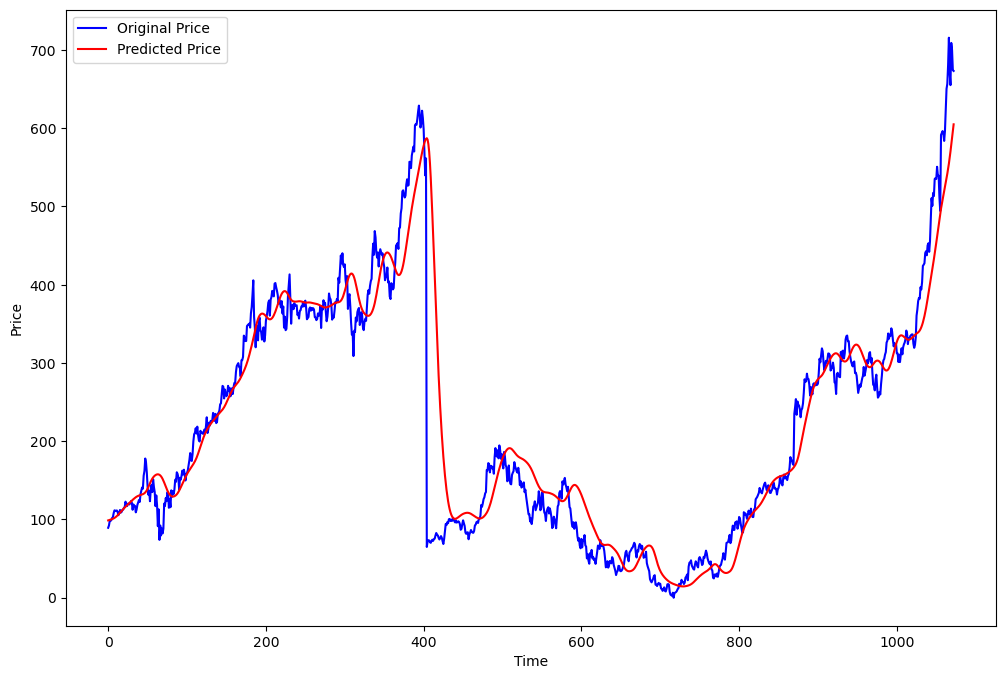

In [57]:
plt.figure(figsize=(12,8))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()